<a href="https://colab.research.google.com/github/Kaiser-14/books-recommendation-system/blob/master/recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommender System for Books



## Summary

In this practice you will create a recommender system for movies! You will explore two simple ways one based on simple correlations between data and the other using a Content Based approach. Finally, you will explore how to create a more complex recommender using Collaborative Filtering from the Spark library in Python.

**Important notes**

For this practice is highly recommended use Google Colab (https://colab.research.google.com) due to is an online tool to work directly with Jupyter notebooks. By default, a lot of important libraries for python are directly available in this environment. The main reasons are the following:

*   The datasets provided for movies recommendation have a lot of data and depends on your computer you can be not able to process the data due to memory problems.
*   The second part is intended to use a more complex tool (Spark) that provide a lot of methods to perform recommendations. Install all the necessary packages to work properly with Spark in python is a very hard process and it is not intended full your computer with all these tools (but this is up to you). We have created a jupyter notebook able to install automatically all the necessary packages in Google Colab directly.
*   We have uploaded a new Docker version with the new changes and the dataset for the practice. If you want use it please update your corrent version. This docker has all the necessary packages to work properly with Spark. ***Important ***, if you have been working during all the lessons with the Docker and you are confortable using it you can continue in this way but is highly recommended (if you want) start using google colab due to is able to provide you a powerfull machine and GPU capabilities for free.
* One manual about how to connect your Google Drive account with Google Colab is coming. it will be available soon if you prefer use Google Colab in order to use a complete Spark environment.

Then, in order to work properly create and account in Google Colab and after this you will be able to upload directly these notebooks and the dataset provided using “File/upload notebook”. If you want work in your own computer there are some lines commented in the first Jupyter Notebook that you have change in order to work locally or in Google Colab (these lines are properly commented in the code). If you want install Spark in your computer please ask us to follow the proper steps to do it (not recommended).

Finally, after test all these examples, you have to use the provided dataset and use some of the presented methods during the lessons in order to create your own recommendation engine to get the most similar items to the requested item. Remember that this is an open practice and you can use all the things that you want. It is not intended get perfect results only something coherent and if is not working provide all the explanations related to the problems that appeared during the development.

The dataset can be downloaded from here:
https://github.com/zygmuntz/goodbooks-10k

This is a github that contains all the CSV files with all the data. The data is related to books and are provided a lot of punctuations from several persons in a lot of books. The main idea is perform a little EDA (some notebooks to do this are provided in the github) in order to understand all the parameters and data in the dataset. After this you can use the techniques presented during lessons to perform a recommendation using one book name as query.

***Reminder***, don't lose time trying to get very good results, only test some methods and your own ideas to try to solve the problem and comment always all the results that you obtain.

Finally, you have to upload a Jupyter Notebook with your development, all the graphs (if are available) and your own comments after each result.



## Files

Before starting to create the model for the recommendations, it is neccessary to understand all the datasets that are available and every possibility to create a recommendation system based on them. The dataset provided is from Goodreads, a "social cataloging" website that allows to search in its database some books, annotations and reviews.

The initial is step is cleaning the data and what is the data and then create a system based on correlation to shows the results.

First, import all the neccessary files and libraries



In [ ]:
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import io

warnings.filterwarnings("ignore", category=RuntimeWarning)
pd.set_option('display.max_columns', 6)

# Load files
from google.colab import files
#uploaded = files.upload()

#book_tags = pd.read_csv(io.BytesIO(uploaded['book_tags.csv']), low_memory=False)
#books = pd.read_csv(io.BytesIO(uploaded['books.csv']), low_memory=False)
#ratings = pd.read_csv(io.BytesIO(uploaded['ratings.csv']), low_memory=False)
#tags = pd.read_csv(io.BytesIO(uploaded['tags.csv']), low_memory=False)
#to_read = pd.read_csv(io.BytesIO(uploaded['to_read.csv']), low_memory=False)

# Upload the files to Colab and read them directly
book_tags = pd.read_csv('book_tags.csv')
books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
to_read = pd.read_csv('to_read.csv')


## Cleaning data

Into the books dataset there are some colums that have NaN values. I do not need these books, because I can not fill the rest of the information without using another dataset, so it is not going to be useful for that case. Looking into the file, there are some wrong values in the 'original_publication_year' (e.: negative values), so I drop these rows.

In [ ]:
books = books.dropna(subset=['original_publication_year', 'isbn'])
books = books[(books['original_publication_year'] >= 0) | (books['original_publication_year'].isnull())]
print(books.original_publication_year.unique())

[2008. 1997. 2005. 1960. 1925. 2012. 1937. 1951. 2000. 1813. 2003. 2011.
 1949. 1945. 1947. 2009. 1999. 1954. 2010. 2002. 1998. 2007. 1595. 1988.
 1993. 1950. 1996. 2006. 1868. 1847. 2001. 1953. 1974. 1979. 1932. 1884.
 1952. 2015. 1995. 2004. 1969. 1936. 1985. 1818. 1977. 1811. 1946. 1859.
 1990. 1964. 1989. 1958. 1973. 1967. 1911. 1891. 1897. 1963. 1844. 2013.
 1862. 1961. 1876. 1962. 1991. 1600. 1965. 1939. 1908. 1850. 2014. 1606.
 1860. 1955. 1978. 1815. 1877. 1986. 1866. 1922. 1987. 1851. 1982. 1843.
 1976. 1994. 1915. 1956. 1980. 1865. 1817. 1957. 1926. 1943. 1938. 1966.
 1981. 2016. 1992. 1984. 1972. 1882. 1895. 1899. 1983. 1900. 1975. 1971.
 1603. 1929. 1968. 1838. 1942. 1903. 1886. 1940. 1887. 1931. 1814. 1719.
 1513. 1880. 1923. 1869. 1849. 1892. 1904. 1726. 1598.  975. 1905. 1935.
 1948. 1856. 1759. 1959. 1605. 1901. 1970. 1902. 1390. 1852. 1909. 1920.
 1934. 1872. 1894. 1599. 1593. 1831. 1812. 1623. 1854. 1596. 1601. 1941.
 1906. 1930. 1916. 1871. 1864. 1320. 1667. 1927. 18

There are two columns for title. I take only "original_title" because "title" column has unnecessary information. One example for comparison:


> original_title: The Hunger Games

> title: The Hunger Games (The Hunger Games, #1)

Instead of removing NaN values as previous lines, in this case I take values from "column" title and insert them into the "column title". Following the format of the column, I consider the title only the characters previous to a parenthesis, because the next characters are going to be Volume information or some unnecessary stuff.

In [ ]:
books['original_title'] = books['original_title'].fillna(books['title'].str.split("(").str[0])
print("Book title Duplicated: ", books[books.duplicated(subset=['original_title'])].original_title)

Book title Duplicated:  976                         Inferno
1226                  The Awakening
1463                     Persepolis
1960                North and South
1973                    Ghost Story
2268                       Magician
2479                  Into the Wild
2683                     Shadowland
2704                  The Awakening
2780               A Grief Observed
2818                           Feed
3036            The Tell-Tale Heart
3057                           Gone
3131                        Fairest
3461                          Snuff
3604                Northern Lights
3798    The Legend of Sleepy Hollow
3801                     The Island
3886                     The Secret
3911                The Beach House
3955                          Fever
4024                  City of Bones
4233                       Twilight
4332       The Red Badge of Courage
4352              The Sands of Time
4435                        Twisted
4483    Avatar: The Last Airbender 
4504

Checking the file I find that some titles contains strange values and in some of them, the complete title it is formed by strange characters. In this case, for a good recommendation, I remove books which contains some of the wrong characters that I have found. I prefer to have several lines to clarify the idea and avoid misunderstanding on the program.

In [ ]:
books = books[~books['original_title'].str.contains("01-11-2009")]
books = books[~books['original_title'].str.contains("Ø")]
books = books[~books['original_title'].str.contains("§")]
books = books[~books['original_title'].str.contains("Ã")]
books = books[~books['original_title'].str.contains("©")]
books = books[~books['original_title'].str.contains("¼")]
books = books[~books['original_title'].str.contains("Ù")]
books = books[~books['original_title'].str.contains("Ú")]
books = books[~books['original_title'].str.contains("¶")]
# It could be done in a simple way (see below), but for better visualization I leave the above lines
# books = books[~books['original_title'].str.contains("01-11-2009|Ø|§|Ã|©|¼|Ù|Ú|¶")]

I considered to remove books that have less than 1000 ratings count, because there were too many books with wrong information. It is good mention that this books exclusion is less than 10% of all the dataset.

In [ ]:
books = books[(books['ratings_count'] >= 10000)]

The final check consist on see if there is any duplicated value in Book ID or titles.

There is no Book ID duplicated, so I do not have to manipulate the dataset, but there are some titles duplicated due to different authors and remakes of ancient titles, and that could be a problem later when creating correlation matrix, so I remove them.

In [ ]:
print("Book ID Duplicated: ", books[books.duplicated(subset=['book_id'])].book_id)
print("original_title Duplicated: ", books[books.duplicated(subset=['original_title'])].original_title.head())

Book ID Duplicated:  Series([], Name: book_id, dtype: int64)
original_title Duplicated:  976             Inferno
1226      The Awakening
1463         Persepolis
1960    North and South
1973        Ghost Story
Name: original_title, dtype: object


Finally drop unnecessary columns and show the books dataset after cleaning

In [ ]:
books = books.drop(['work_id', 'isbn13', 'title', 'language_code', 'work_ratings_count',
                    'work_text_reviews_count', 'image_url', 'small_image_url', 'books_count',
                    'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'best_book_id',
                    'goodreads_book_id', 'isbn'], axis=1)

print(books.columns.values)
print(books.head())

['book_id' 'authors' 'original_publication_year' 'original_title'
 'average_rating' 'ratings_count']
   book_id                      authors  original_publication_year  \
0        1              Suzanne Collins                     2008.0   
1        2  J.K. Rowling, Mary GrandPré                     1997.0   
2        3              Stephenie Meyer                     2005.0   
3        4                   Harper Lee                     1960.0   
4        5          F. Scott Fitzgerald                     1925.0   

                             original_title  average_rating  ratings_count  
0                          The Hunger Games            4.34        4780653  
1  Harry Potter and the Philosopher's Stone            4.44        4602479  
2                                  Twilight            3.57        3866839  
3                     To Kill a Mockingbird            4.25        3198671  
4                          The Great Gatsby            3.89        2683664  


Checking rating distribution shows that is more common to have higher ratings

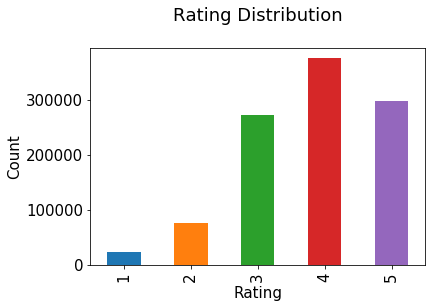

In [ ]:
plt.rc("font", size=15)
ratings['rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## Collaborative Filtering

I merge the "ratings" dataframe and "books" dataframe in order to know all the information for each book rated for every user.

As I said before, it is needed to remove title duplicates for creating the next matrices.

In [ ]:
combine_book_rating = pd.merge(ratings, books, on='book_id')
combine_book_rating = combine_book_rating.drop_duplicates(['user_id', 'original_title'])

print(combine_book_rating.head())
print(list(combine_book_rating.columns.values))

   user_id  book_id  rating      ...             original_title  \
0        1      258       5      ...       La sombra del viento   
1       11      258       3      ...       La sombra del viento   
2      143      258       4      ...       La sombra del viento   
3      242      258       5      ...       La sombra del viento   
4      325      258       4      ...       La sombra del viento   

   average_rating ratings_count  
0            4.24        263685  
1            4.24        263685  
2            4.24        263685  
3            4.24        263685  
4            4.24        263685  

[5 rows x 8 columns]
['user_id', 'book_id', 'rating', 'authors', 'original_publication_year', 'original_title', 'average_rating', 'ratings_count']


I get the rating matrix for users in columns, and titles as index

In [ ]:
combine_book_rating_pivot = combine_book_rating.pivot(index='original_title', columns='user_id',
                                                      values='rating').fillna(0)

print(combine_book_rating_pivot.head())
print("Shape of combine_book_rating_pivot", combine_book_rating_pivot.shape)

user_id                                             1      2      3      \
original_title                                                            
                                                      0.0    0.0    0.0   
 A Monster Calls                                      0.0    0.0    0.0   
 Animal Farm & 1984                                   0.0    0.0    0.0   
 Burned (Burned, #1)                                  0.0    0.0    0.0   
 Call the midwife : a true story of the East En...    0.0    0.0    0.0   

user_id                                             ...    37076  41961  42208  
original_title                                      ...                         
                                                    ...      0.0    0.0    0.0  
 A Monster Calls                                    ...      0.0    0.0    0.0  
 Animal Farm & 1984                                 ...      0.0    0.0    0.0  
 Burned (Burned, #1)                                ...      0.0    0

I use the library "TruncatedSVD" from sklearn for dimensionality reduction and fit it to a model. From a shape of more than 13k components, I obtain 12 latent variables.

Finally a create a correlation matrix based on correlation coefficients between books.

In [ ]:
SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(combine_book_rating_pivot)
print("Shape of matrix", matrix.shape)

corr = np.corrcoef(matrix)

Shape of matrix (6972, 12)


In order to show the recommendation for books, I create a list of all the remaining titles in the dataframe. To check the correct working of the system, I select the book "The Hobbit or There and Back Again". The system should recommend some novels of Tolkien based on the Middle Age series.

In [ ]:
book_title = combine_book_rating_pivot.index
book_list = list(book_title)
book = book_list.index("The Hobbit or There and Back Again")

I only want the best recommendation books, so I only take those titles with a correlation value above 0.9.

In [ ]:
result_corr = corr[book]
result_list = list(book_title[(result_corr >= 0.9)])

Create a dictionary to store the title books with the correlation value

In [ ]:
result_dict = {}
for i in range(0, len(result_list)):
    result_dict[corr[book, book_list.index(result_list[i])]] = result_list[i]

As said before, I print the recommendations for the specified book and the first recommendation is "The Fellowship of the Ring", one of the books from Tolkien's Middle Age novels. The system seems to be working properly.

In [ ]:
for key, loop in zip(sorted(result_dict, reverse=True), range(0, 11)):
    if loop == 0:
        print("Recommendations for the book '{0}':".format(result_dict[key]))
    else:
        print("{0}: {1}".format(result_dict[key], key))

Recommendations for the book 'The Hobbit or There and Back Again':
 The Fellowship of the Ring: 0.9895930267492073
The Hitchhiker's Guide to the Galaxy: 0.9323305904731823
The Princess Bride: 0.9257290088733875
Northern Lights: 0.9216944132971345
Ender's Game: 0.9109579308498627


Finally, I test for random books. Sometimes the system recommends more than 10 books, so I only take the most correlated of them


In [ ]:
book = book_list.index(np.random.choice(book_list))

result_corr = corr[book]
result_list = list(book_title[(result_corr >= 0.9)])

result_dict = {}
for i in range(0, len(result_list)):
    result_dict[corr[book, book_list.index(result_list[i])]] = result_list[i]

for key, loop in zip(sorted(result_dict, reverse=True), range(0, 11)):
    if loop == 0:
        print("Recommendations for the book '{0}':".format(result_dict[key]))
    else:
        print("{0}: {1}".format(result_dict[key], key))

Recommendations for the book 'Murder in the Calais Coach':
The Murder of Roger Ackroyd: 0.9894859742863298
Death on the Nile: 0.9866823416584527
Ten Little Niggers: 0.9632630936968509
The Mysterious Affair at Styles: 0.9612036449226357
The ABC Murders: 0.9601989003075054
The Hound of the Baskervilles: 0.9565847219979062
Le Fantôme de l'Opéra: 0.9524887786149593
Oliver Twist: 0.950694784682697
A Christmas Carol: 0.9503138859787081
Treasure Island: 0.9496711667609571
